# Lets Keep Classification Simple !

toc: true
badges: true
comments: true
categories: [jupyter]

Whenever it comes to image domain task like classification, segmentation etc, the first thing that comes to the mind is of a conplex model like Convolutional Neural Network which performs a heavily complicated operation over the image to extract meaningful features and then perform the required task using the features. 

![](https://miro.medium.com/max/1280/1*Bb4DXTfBMgLZJ3cPAZ0Tmg.gif) 

Rather than involving a complicated model with a hope that a complex model is bound to perform beat on the data and give us almost perfect performance, its always wise to come-up with a very simple algorithm based on visual observation or simple statistical studies over the given image data to get a descent baseline performance and then build upon it till we reach a saturation of performance.
> Note: Many a times, even a simple algorithm can outperform a complex model with millions of parameters on the test data.

## Baseline Model
A simple model which you are confident should perform reasonably well. It should be very simple to implement, and very easy to test, so that you can then test each of your improved ideas, and make sure they are always better than your baseline. Without starting with a sensible baseline, it is very difficult to know whether your super-fancy models are actually any good.

## Baseline for MNIST data classification

MNIST is the most basic dataset in computer vision. It itself and its varients serve as baseline datasets for testing most of the new approaches that researchers come up in vision.
<br>
In this article, we shall try to build a very simple decision policy to classify a give test image into one of the digit classes without involving any convolution operation or complicated feature extraction and classifier.

## Setup Fastai and Necessary Imports

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

This sets up the fastai library and imports all the APIs to be used later.

## Loading Dataset
We will download the MNIST dataset provided by Fastai using the ```untar_data()``` function and store the path to each digit folder in a list for preparing the training data.

In [3]:
path = untar_data(URLs.MNIST)

training_paths = (path/'training').ls().sorted()

test_paths = (path/'testing').ls().sorted()

Let's have a  look at some sample images from each class to understand the data and design a baseline algorithm.

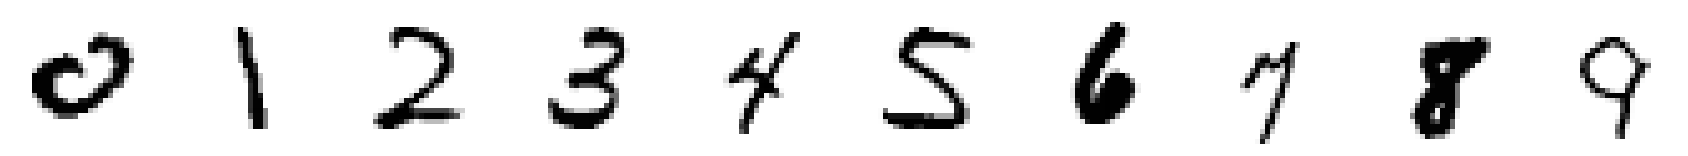

In [78]:
sample_images = [Image.open(training_paths[i].ls()[0]) for i in range(10)]

show_images(sample_images, nrows=1)

## Approach for the Baseline
One good approach to creating a baseline is to think of a simple, easy-to-implement model. The simplest thing that comes to the mind on looking at the images is that:  
1. Each number has a characteristic shape and pixel distribution. Every other image of the same number should ideally possess similar characteristics and pixel distribution.  
2. If we can come up with a representative for each class that posseses characteristics of maximum members of the class and then simply compare every unknown test image with each of this representative and classify it to that class, whose representative is most similar to it.
3. Similarity can be defined in terms of pixel wise difference which takes into account pixel distribution into the similarity metric.
4. Finally the most basic representative for a class can be its mean image.

## Baseline Algorithm
1. Prepare training data by stacking up all images of a particular digit into one tensor.
2. Find the mean image for each of these digits.
3. Loop over all the test image and find its distance from each of the mean image and consider its label to be the one with the minimum distance.
4. Calculate accuracy of this method.

## Preparing the training and testing tensors

In [ ]:
training_data = []

for pth in training_paths:
    
    training_data.append(torch.stack([tensor(Image.open(o)) for o in pth.ls()]).float()/255)
    
test_data = []

for pth in test_paths:
    
    test_data.append(torch.stack([tensor(Image.open(o)) for o in pth.ls()]).float()/255)

## Computing the Mean Image for each class

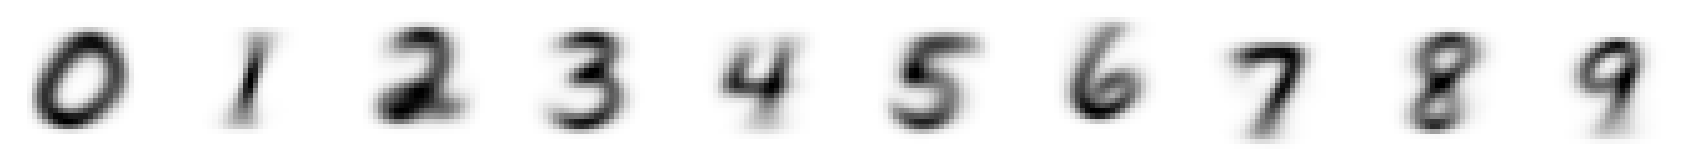

In [23]:
mean_images = [data.mean(0) for data in training_data]

show_images(mean_images, nrows=1)

## Computing the similarity 
Similarity is computed as the L2 distance or the Euclidean distance between each test image and each of the mean image and storing the minimumum distance as its predicted label.
<br>

Finally computing the accuracy of this approach.

In [66]:
total = 0
correct = 0
for i in range(10):
  
    total += test_data[i].shape[0]
    
    predict = tensor([tensor([F.mse_loss(test_data[i][im],mean_images[mean]).sqrt() for mean in range(10)]).argmin() for im in range(test_data[i].shape[0])])
    
    correct += (predict == i).sum()

In [67]:
print('Accuracy of simple model is: {:.2f} %'.format(correct/total*100))

Accuracy of simple model is: 82.03 %


Notice that just using mean image and L2 distance, we can acheive a baseline performance of 82.03% on MNIST data. This is probably the most simple classification strategy that could be thought of. So any model that performs worse than this should not be accepted.
<br>

It is really interesting to note that such a simple approach performs descent on a image data which is fairly complicated. The conclusion is to always start with simpe ideas and establish a baseline model and then build upon that idea and improve performance from the benchmark performance acheived by the baseline model.